# Extracting Titanic Data Explanations in AIME (Only for those who have signed a non-disclosure agreement and/or paid a license fee.)
- This is an example of a program that uses AIME to produce global feature importance for titanic data.
- If you use this software for research or other purposes, please cite the following paper
```
@ARTICLE{10247033,
author={Nakanishi, Takafumi},
journal={IEEE Access},
  title={Approximate Inverse Model Explanations (AIME): Unveiling Local and Global Insights in Machine Learning Models},
  year={2023},
  volume={11},
  number={},
  pages={101020-101044},
 doi={10.1109/ACCESS.2023.3314336}}
```

- AIME is dual-licensed under the The 2-Clause BSD License and the Commercial License. Apply the The 2-Clause BSD License only for academic or research purposes, and apply Commercial License for commercial and other purposes. You can choose which one to use.
- For those interested in Commercial License, a licensing fee may be required. Please contact us for more details at: Email: takafumi@eigenbeats.com



> This code and the package are strictly confidential.
> Do not deploy to anyone other than faculty and students who are under the same NDA within this seminar.
>If this information is leaked, a court case for damages may be filed.
>
> このコードと付属するパッケージは極秘です。
> 同じ守秘義務を結んだ教員、学生以外には展開しないようお願いいたします。
> もしこれらの情報が漏れた場合は損害賠償請求裁判を起こす可能性があります。



## Titanic dataset reading

In [ ]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv(
    "/home/kosukeyano/workspace/huber_aime/data/titanic_data.csv",
    header=0,
    sep=",",
)
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Check for missing values

In [ ]:
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df["Age"].unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
titanic_df["Age"].median()


28.0

### Processing missing values

In [ ]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())


In [ ]:
titanic_df["Embarked"].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")


In [ ]:
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
titanic_df["Fare"].unique()


array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
titanic_df = titanic_df.dropna(subset=["Fare"])


In [ ]:
titanic_df = titanic_df.reset_index()


In [ ]:
titanic_df.isnull().sum()


index            0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
titanic_df["Cabin"].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Feature selection
- Narrow down to only the objective variable "Survived" and the explanatory variables "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", and "Embarked".

In [ ]:
ind_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
dep_features = ["Survived"]
features = dep_features + ind_features
categorical_features = ["Pclass", "Sex", "Embarked"]

titanic_df2 = titanic_df.loc[:, features]
titanic_df2


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Convert categorical data to One-Hot Vector
- Pclass, Sex, and Embarked items converted to numeric values
- AIME needs to convert categorical data to One-Hot Vector

In [ ]:
print(titanic_df2.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

titanic_data = titanic_df2.copy()
encoder = OneHotEncoder(sparse_output=False)

columns_to_encode = ["Pclass", "Sex", "Embarked"]
one_hot = encoder.fit_transform(titanic_data[columns_to_encode])
feature_names = encoder.get_feature_names_out(columns_to_encode)
one_hot_df = pd.DataFrame(one_hot, columns=feature_names)
titanic_data = titanic_data.drop(columns_to_encode, axis=1)
titanic_data = pd.concat([titanic_data, one_hot_df], axis=1)


In [ ]:
titanic_data


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0,28.0,1,2,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
column_features = titanic_data.columns[1:].values
column_features


array(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'], dtype=object)

### Set the objective variable to y and the explanatory variable to X

In [ ]:
X = titanic_data.loc[:, column_features].values
X


array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

In [ ]:
y = titanic_data["Survived"].values
y


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Separate training data from test data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Create a black box model
- Using a machine learning method called LightGBM, we will build a model that predicts whether a person will live or die given new "'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'" values.

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.8491620111731844

### Did Rose and Jack survive the movie Titanic?
- This is Authors's memory and guess, so it could be wrong.
  - 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'
  - Passenger Class(Pclass): 1 for Rose, 3 for Jack
  - Sex: 0 for Rose, 1 for Jack
  - Age: 17 for Rose, 19 for Jack
  - Number of siblings (SibSp): 0 for Rose, 0 for Jack
  - Number of parents and children (Parch): 1 for Rose, 0 for Jack
  - Fare (Fare): Rose does not know, so she enters the average; Jack enters 0 (he won a poker bet and got on for free).
  - Port of embarkation: I don't know about Rose or Jack, but I'll put 0.

In [ ]:
# Age	SibSp	Parch	Fare	Pclass_1	Pclass_2	Pclass_3	Sex_female	Sex_male	Embarked_C	Embarked_Q	Embarked_S

data = np.array(
    [
        [17, 0, 1, titanic_data["Fare"].mean(), 1, 0, 0, 1, 0, 0, 0, 0],
        [19, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    ]
)


In [ ]:
data.shape


(2, 12)

In [ ]:
import pandas as pd

role = ["Rose", "Jack"]
movie_titanic = pd.DataFrame(data, columns=column_features, index=role)
movie_titanic


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Rose,17.0,0.0,1.0,32.204208,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Jack,19.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
movie_titanic.loc["Jack"].values


array([19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.])

In [ ]:
movie_titanic.loc["Rose"].values


array([17.        ,  0.        ,  1.        , 32.20420797,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [ ]:
result = model.predict_proba([movie_titanic.loc["Rose"].values])
result


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([[0.0033944, 0.9966056]])

In [ ]:
result = model.predict_proba([movie_titanic.loc["Jack"].values])
result


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([[0.93804315, 0.06195685]])

- Rose survived and Jack died, which is the same ending as in the movie.
- However, no explanation is given as to why Rose survived and why Jack died.

## Visualization of rationale explanation by AIME

In [ ]:
import sys

if "/home/kosukeyano/workspace/huber_aime" not in sys.path:
    sys.path.append("/home/kosukeyano/workspace/huber_aime")

from aime_xai import AIME, AIME_GPU


ModuleNotFoundError: No module named 'cudf'

In [ ]:
y_hat_train = model.predict_proba(X_train)
y_hat_test = model.predict_proba(X_test)


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
explainer = AIME()
explainer.create_explainer(X_train, y_hat_train, normalize=True)


In [ ]:
explainer.A_dagger.shape


(12, 2)

In [ ]:
explainer.A_dagger


array([[ 0.1099528 , -0.17674897],
       [ 0.05823628, -0.09361474],
       [-0.09980313,  0.16043339],
       [-0.26927047,  0.43285191],
       [-0.32286777,  0.51900951],
       [-0.11132371,  0.17895272],
       [ 0.36751482, -0.59077957],
       [-0.66220915,  1.06450031],
       [ 0.66220915, -1.06450031],
       [-0.16832967,  0.27058972],
       [-0.03755968,  0.06037713],
       [ 0.17002486, -0.27331473]])

### Global feature importance

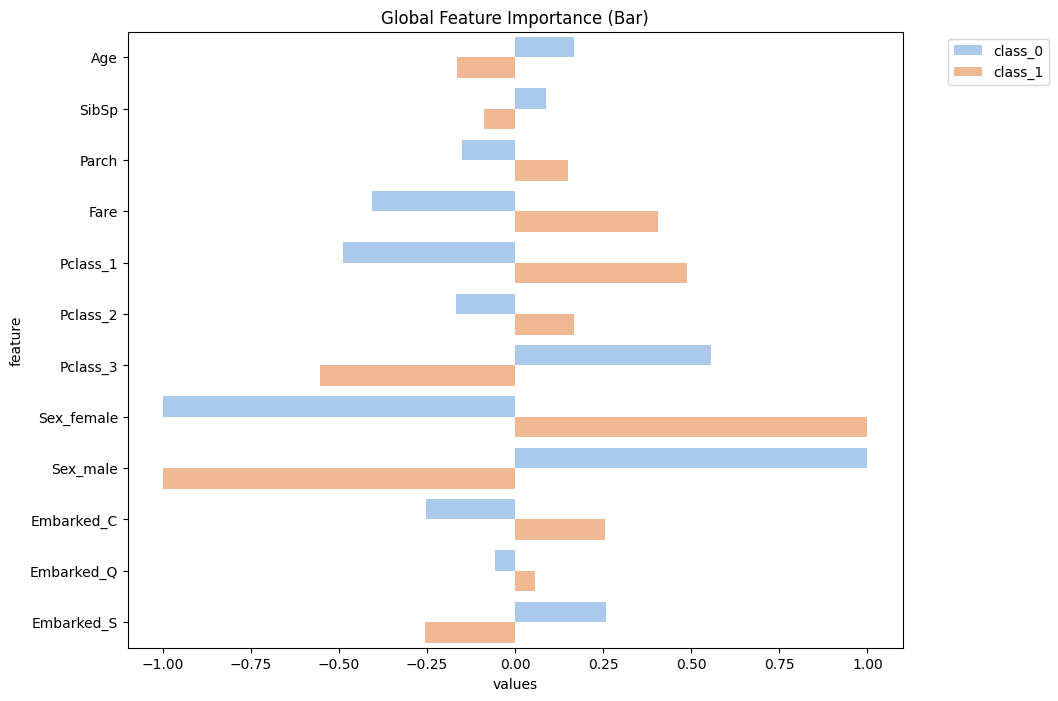

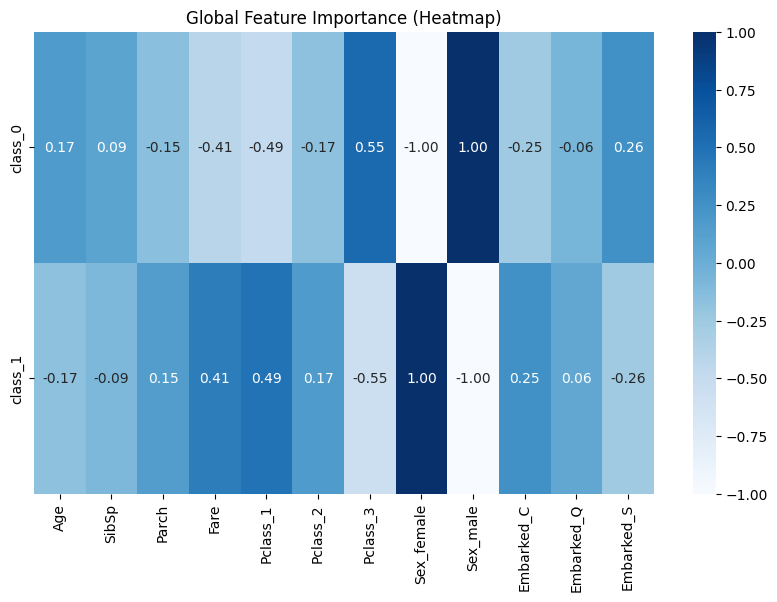

In [ ]:
global_importance_df = explainer.global_feature_importance(
    feature_names=movie_titanic.columns.values
)


In [ ]:
global_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,0.166039,0.087942,-0.150712,-0.406625,-0.487562,-0.16811,0.554983,-1.0,1.0,-0.254194,-0.056719,0.256754
class_1,-0.166039,-0.087942,0.150712,0.406625,0.487562,0.16811,-0.554983,1.0,-1.0,0.254194,0.056719,-0.256754


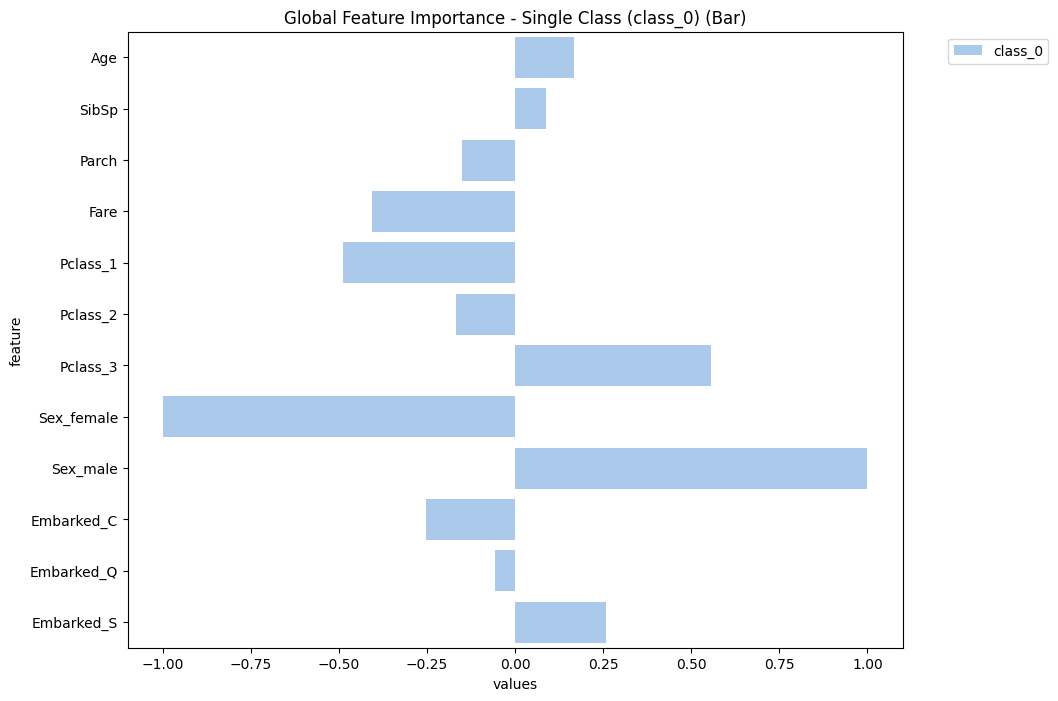

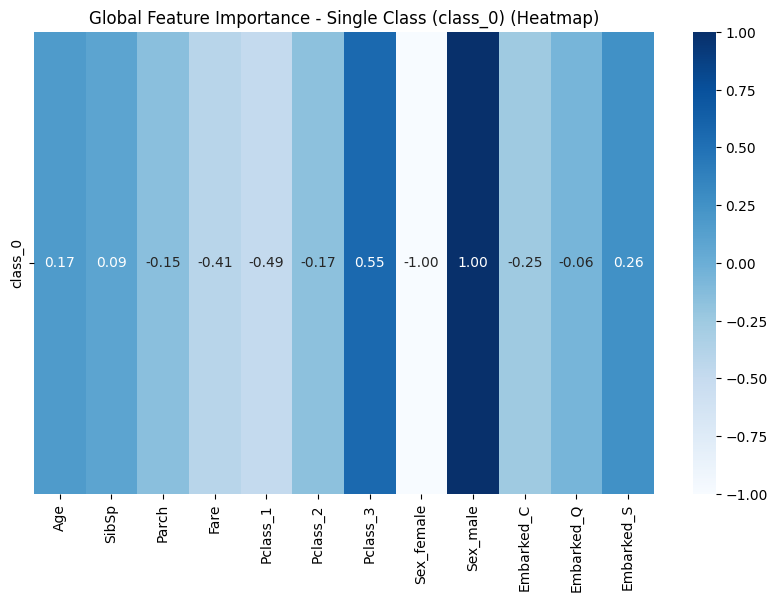

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=0
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,0.166039,0.087942,-0.150712,-0.406625,-0.487562,-0.16811,0.554983,-1.0,1.0,-0.254194,-0.056719,0.256754


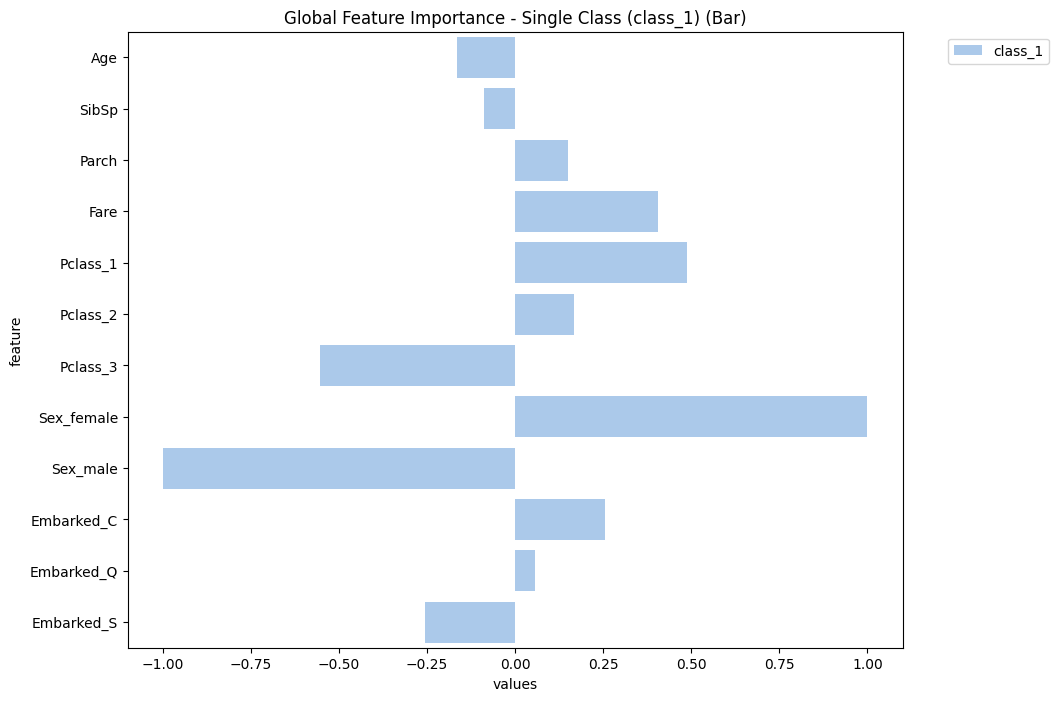

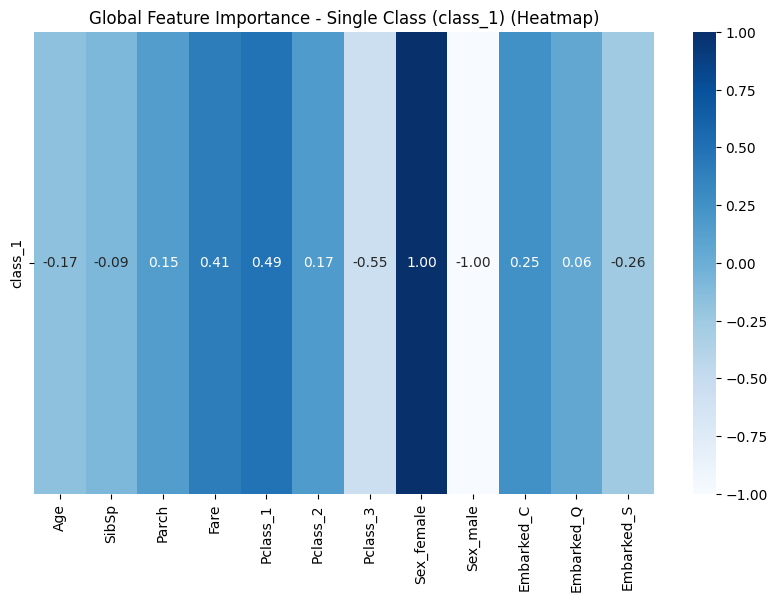

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=1
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_1,-0.166039,-0.087942,0.150712,0.406625,0.487562,0.16811,-0.554983,1.0,-1.0,0.254194,0.056719,-0.256754


### Local feature importance

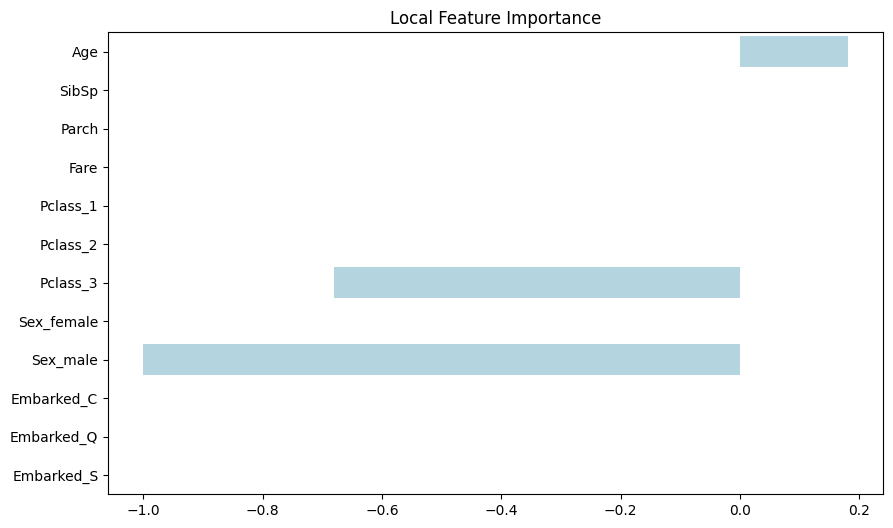

In [ ]:
local_importance_df = explainer.local_feature_importance(
    movie_titanic.loc["Jack"].values,
    [0, 1],
    feature_names=movie_titanic.columns.values,
    scaler=explainer.scaler,
    ignore_zero_features=True,
)


In [ ]:
local_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.180874,0.0,-0.0,-0.0,-0.0,-0.0,-0.680227,-0.0,-1.0,-0.0,-0.0,0.0


### Representative estimation instance & Representative instance similarity distribution plot

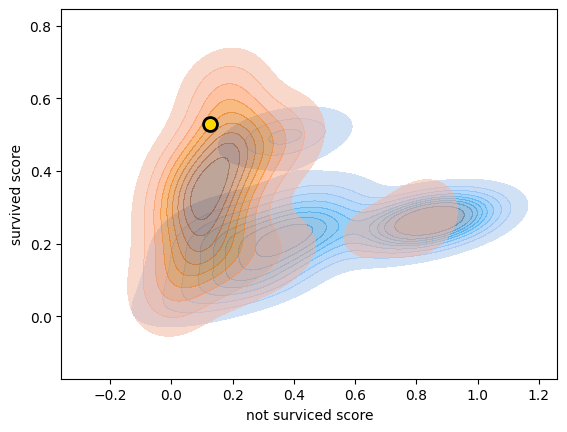

In [ ]:
repdf, resdf = explainer.plot_rep_instance_similarity(
    X_test,
    y_hat_test,
    x=movie_titanic.loc["Rose"].values,
    feature_names=movie_titanic.columns.values,
    class_names=["not surviced", "survived"],
    gamma=0.1,
    scaler=explainer.scaler,
    class_indices=[0, 1],
)


In [ ]:
repdf


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
not surviced,30.839822,0.595886,0.309936,18.372475,0.101116,0.160110,0.738774,0.031707,0.968293,0.116345,0.079145,0.804510
survived,27.084390,0.422770,0.523536,53.548870,0.460032,0.277307,0.262661,0.853598,0.146402,0.285402,0.107157,0.607441


In [ ]:
resdf


,not surviced score,survived score,result
0,0.383530,0.184916,0
1,0.872012,0.268953,0
2,0.065793,0.029590,0
3,0.047057,0.298009,1
4,0.111706,0.260360,0
...,...,...,...
174,0.139423,0.300202,1
175,0.872380,0.269444,0
176,0.063528,0.361741,1
177,0.845510,0.266778,0


## HuberAIME

In [ ]:
y_hat_train = model.predict_proba(X_train)
y_hat_test = model.predict_proba(X_test)


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
explainer = AIME(use_huber=True)
explainer.create_explainer(X_train, y_hat_train, normalize=True)


In [ ]:
explainer.A_dagger.shape


(12, 2)

In [ ]:
explainer.A_dagger


array([[-0.01990708, -0.12053274],
       [-0.19525109, -0.07733481],
       [-0.33323296,  0.10864024],
       [-0.40305738,  0.33056262],
       [-0.4776187 ,  0.54035434],
       [-0.28915892,  0.22021939],
       [ 0.64481952, -0.64262995],
       [-0.76370351,  1.09603633],
       [ 0.76370351, -1.09603633],
       [-0.34139398,  0.16125002],
       [-0.20045298, -0.0276952 ],
       [ 0.42479826, -0.12190209]])

### Global feature importance

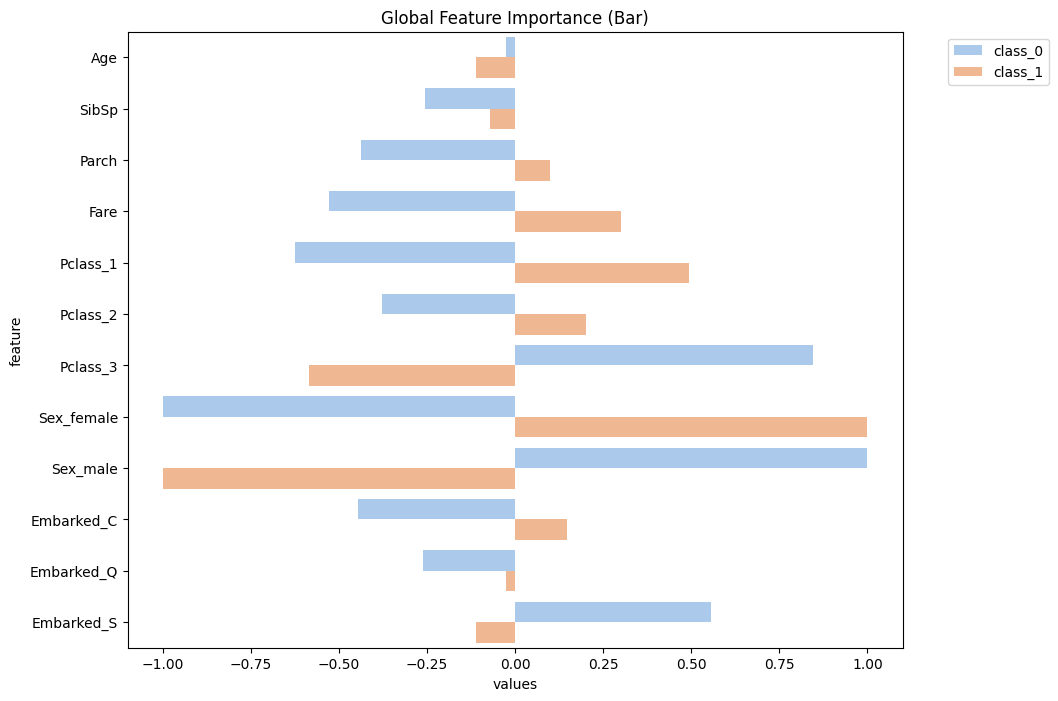

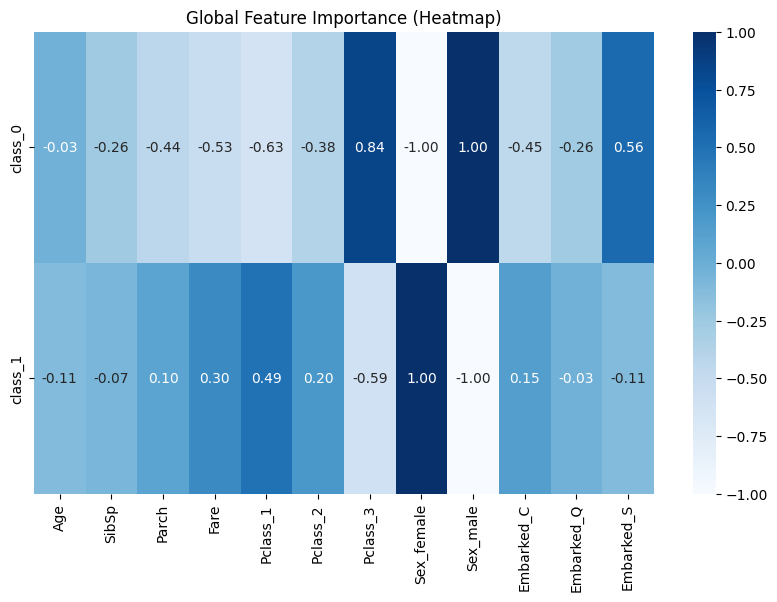

In [ ]:
global_importance_df = explainer.global_feature_importance(
    feature_names=movie_titanic.columns.values
)


In [ ]:
global_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,-0.026067,-0.255663,-0.436338,-0.527767,-0.625398,-0.378627,0.844332,-1.0,1.0,-0.447024,-0.262475,0.556235
class_1,-0.109971,-0.070559,0.099121,0.301598,0.493008,0.200923,-0.586322,1.0,-1.0,0.147121,-0.025269,-0.111221


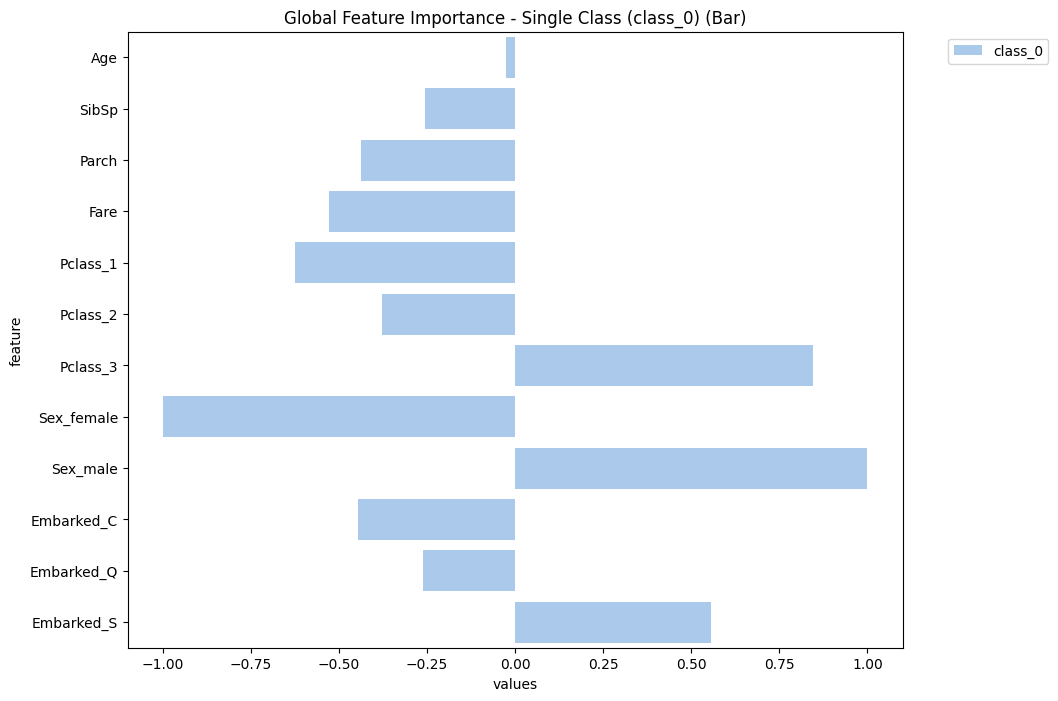

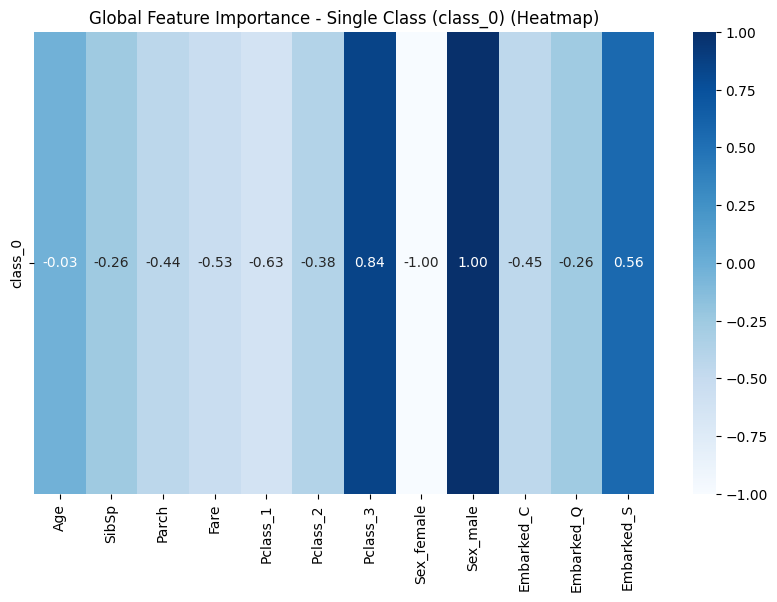

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=0
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,-0.026067,-0.255663,-0.436338,-0.527767,-0.625398,-0.378627,0.844332,-1.0,1.0,-0.447024,-0.262475,0.556235


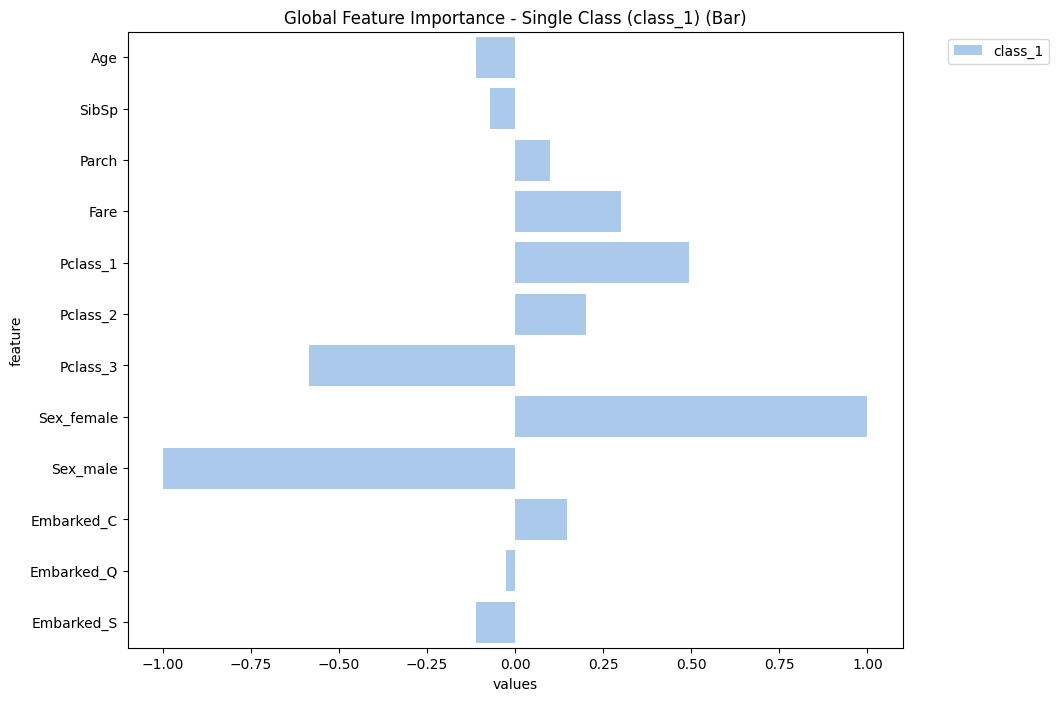

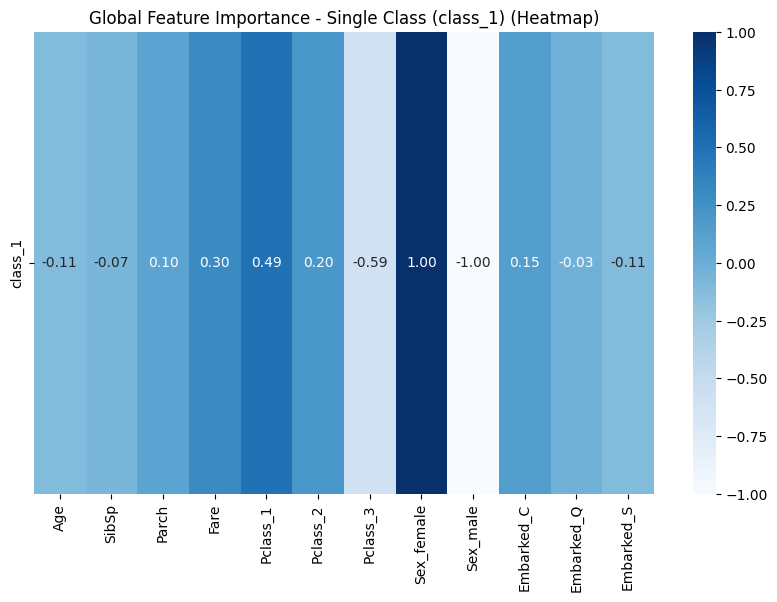

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=1
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_1,-0.109971,-0.070559,0.099121,0.301598,0.493008,0.200923,-0.586322,1.0,-1.0,0.147121,-0.025269,-0.111221


### Local feature importance

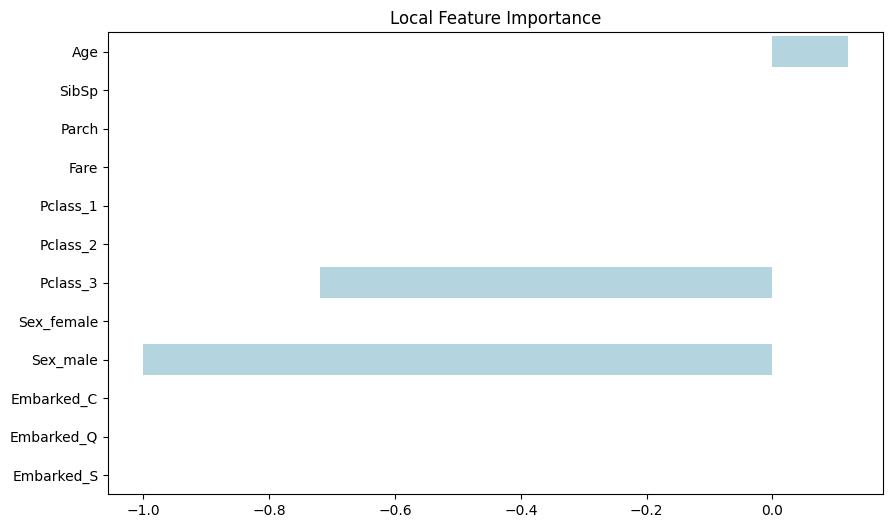

In [ ]:
local_importance_df = explainer.local_feature_importance(
    movie_titanic.loc["Jack"].values,
    [0, 1],
    feature_names=movie_titanic.columns.values,
    scaler=explainer.scaler,
    ignore_zero_features=True,
)


In [ ]:
local_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.119797,0.0,-0.0,-0.0,-0.0,-0.0,-0.718638,-0.0,-1.0,-0.0,0.0,0.0


### Representative estimation instance & Representative instance similarity distribution plot

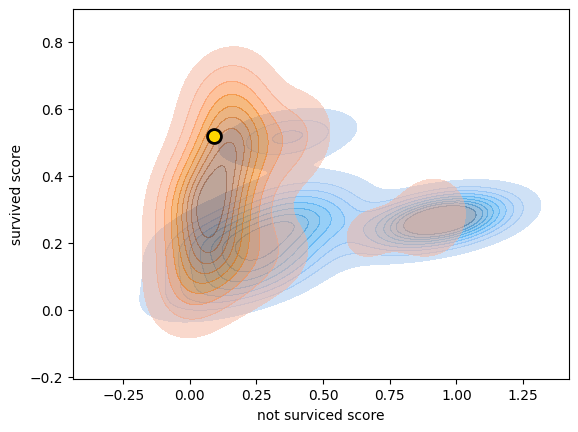

In [ ]:
repdf, resdf = explainer.plot_rep_instance_similarity(
    X_test,
    y_hat_test,
    x=movie_titanic.loc["Rose"].values,
    feature_names=movie_titanic.columns.values,
    class_names=["not surviced", "survived"],
    gamma=0.1,
    scaler=explainer.scaler,
    class_indices=[0, 1],
)


In [ ]:
repdf


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
not surviced,29.138821,0.30690,0.118339,11.669739,0.035142,0.088310,0.876548,-0.016603,1.016603,0.049686,0.032554,0.917760
survived,27.820752,0.44133,0.481025,48.424167,0.469132,0.293968,0.236899,0.868609,0.131391,0.243288,0.081966,0.674746


In [ ]:
resdf


,not surviced score,survived score,result
0,0.346944,0.165969,0
1,0.971396,0.274283,0
2,0.047525,0.025773,0
3,0.028980,0.269170,1
4,0.082613,0.234104,0
...,...,...,...
174,0.119770,0.273947,1
175,0.971546,0.274728,0
176,0.039588,0.332054,1
177,0.951103,0.270866,0


## HuberAIME

In [ ]:
y_hat_train = model.predict_proba(X_train)
y_hat_test = model.predict_proba(X_test)


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
explainer = AIME(use_huber=True)
explainer.create_explainer(X_train, y_hat_train, normalize=True)


In [ ]:
explainer.A_dagger.shape


(12, 2)

In [ ]:
explainer.A_dagger


array([[-0.01990708, -0.12053274],
       [-0.19525109, -0.07733481],
       [-0.33323296,  0.10864024],
       [-0.40305738,  0.33056262],
       [-0.4776187 ,  0.54035434],
       [-0.28915892,  0.22021939],
       [ 0.64481952, -0.64262995],
       [-0.76370351,  1.09603633],
       [ 0.76370351, -1.09603633],
       [-0.34139398,  0.16125002],
       [-0.20045298, -0.0276952 ],
       [ 0.42479826, -0.12190209]])

### Global feature importance

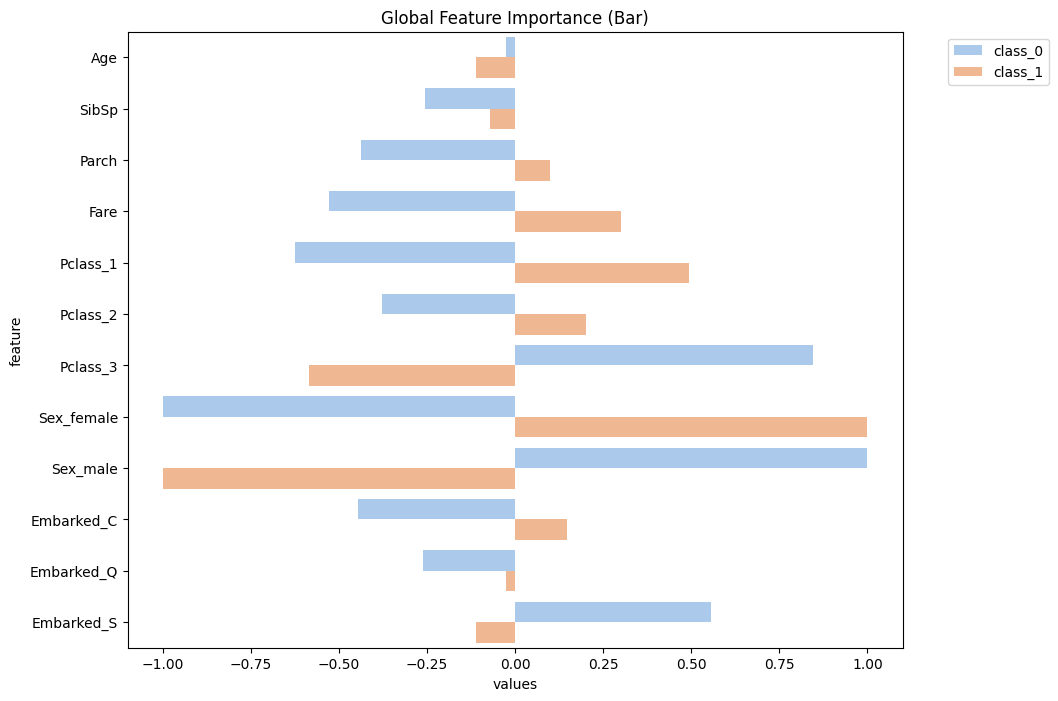

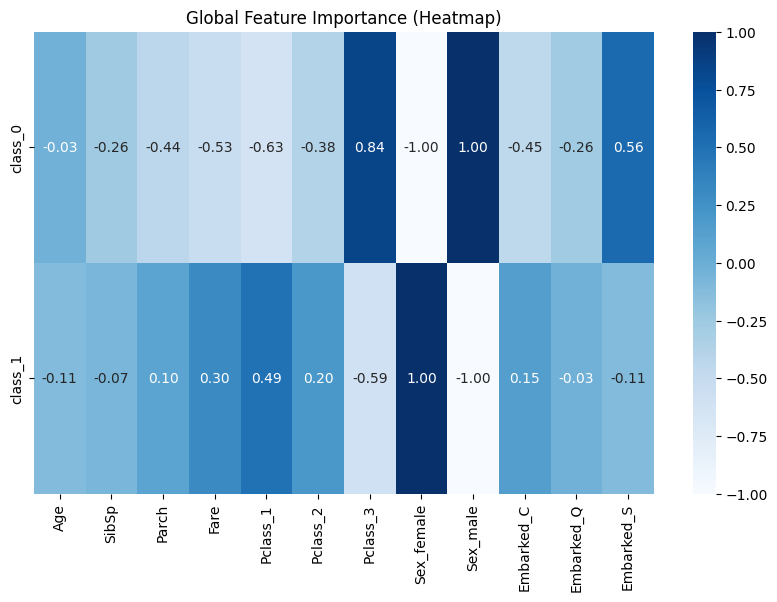

In [ ]:
global_importance_df = explainer.global_feature_importance(
    feature_names=movie_titanic.columns.values
)


In [ ]:
global_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,-0.026067,-0.255663,-0.436338,-0.527767,-0.625398,-0.378627,0.844332,-1.0,1.0,-0.447024,-0.262475,0.556235
class_1,-0.109971,-0.070559,0.099121,0.301598,0.493008,0.200923,-0.586322,1.0,-1.0,0.147121,-0.025269,-0.111221


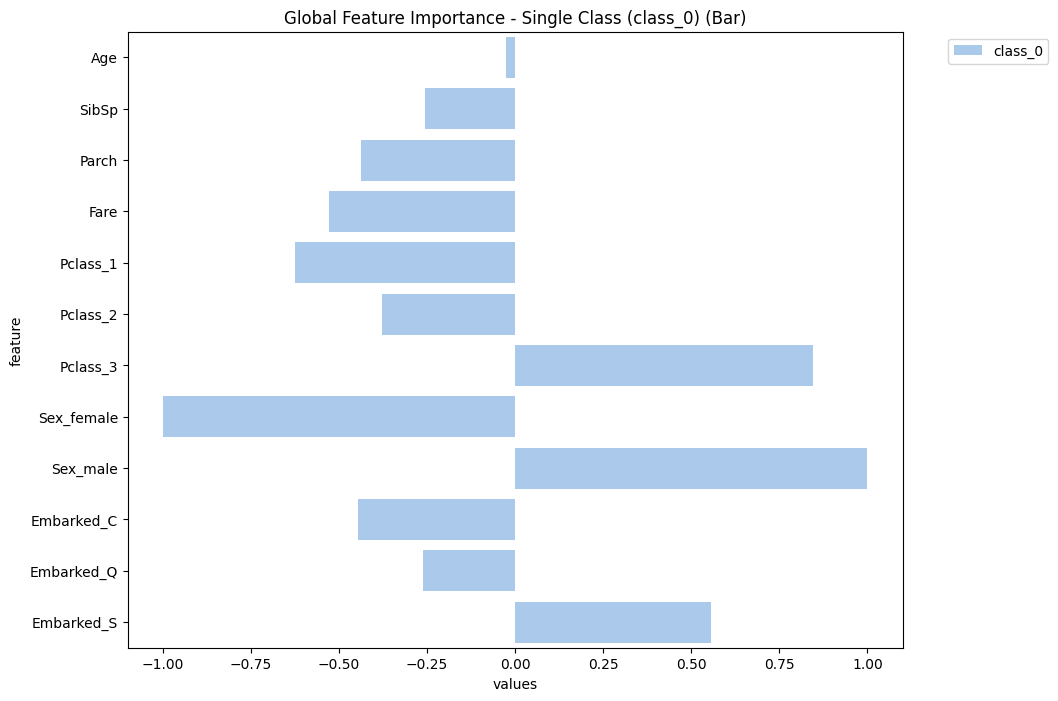

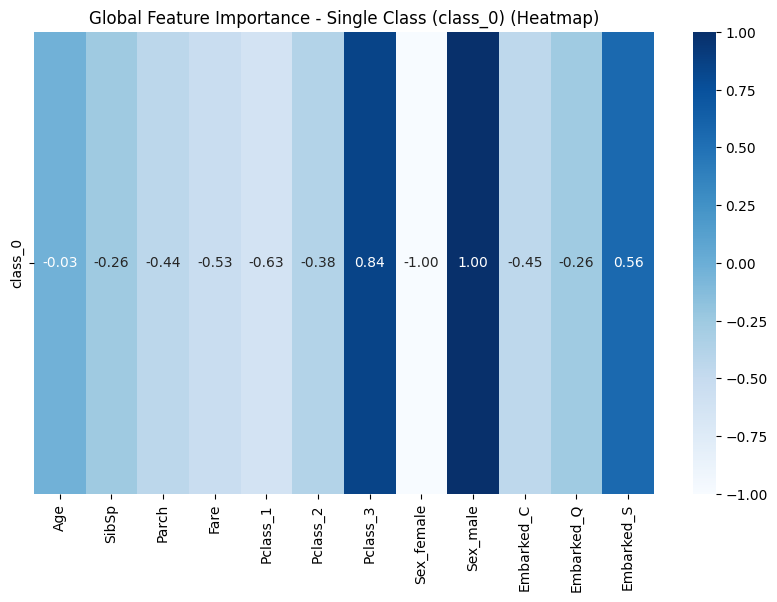

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=0
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,-0.026067,-0.255663,-0.436338,-0.527767,-0.625398,-0.378627,0.844332,-1.0,1.0,-0.447024,-0.262475,0.556235


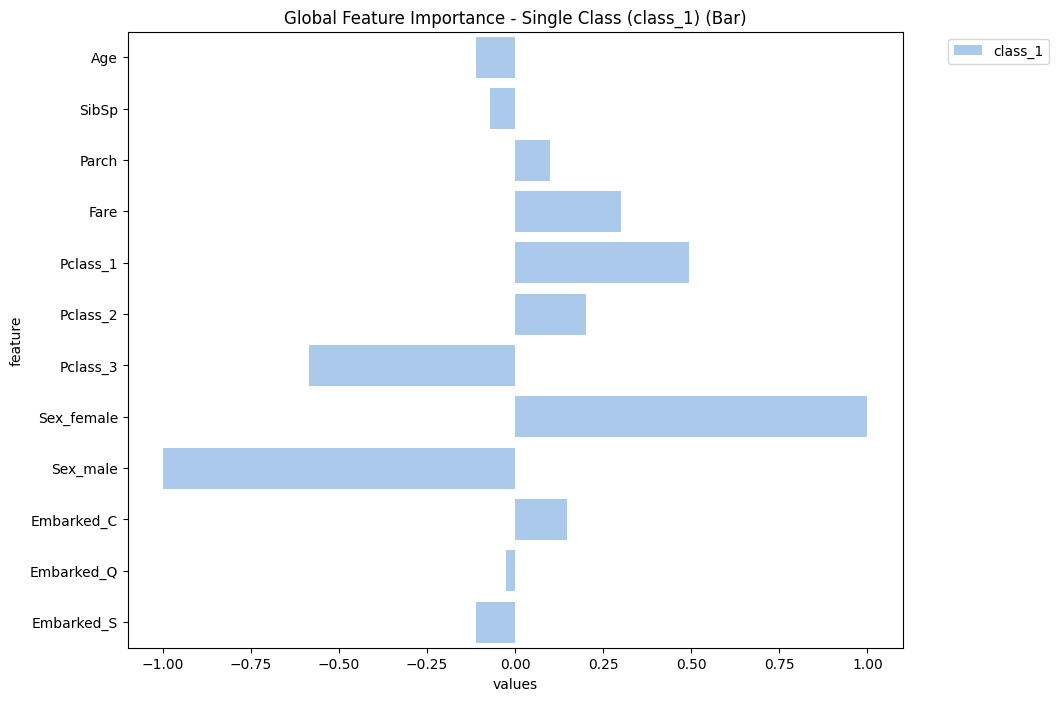

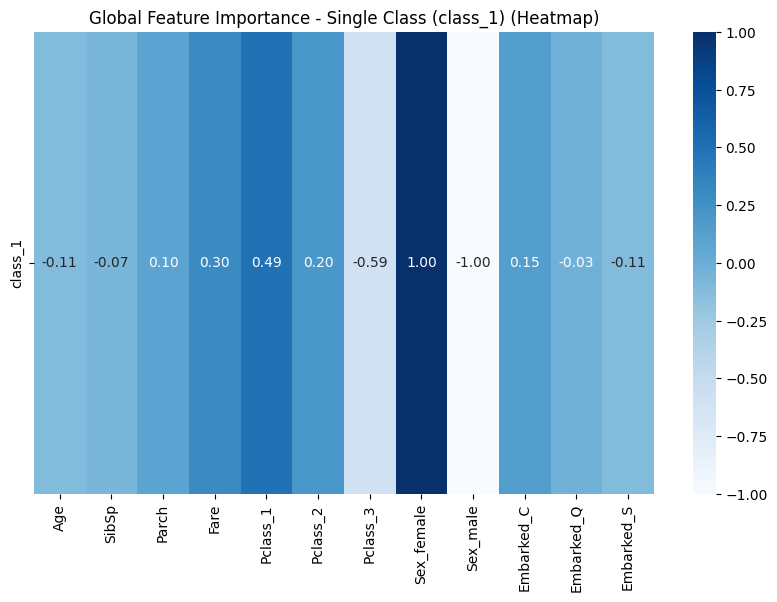

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=1
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_1,-0.109971,-0.070559,0.099121,0.301598,0.493008,0.200923,-0.586322,1.0,-1.0,0.147121,-0.025269,-0.111221


### Local feature importance

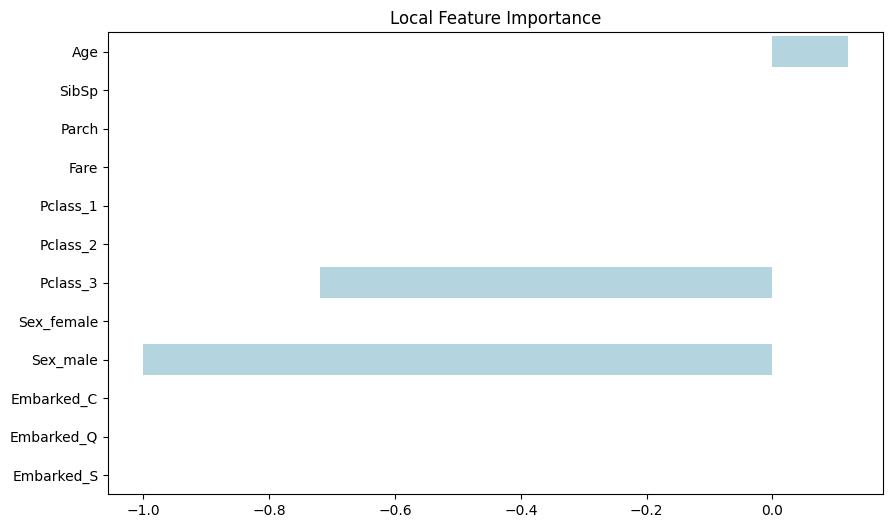

In [ ]:
local_importance_df = explainer.local_feature_importance(
    movie_titanic.loc["Jack"].values,
    [0, 1],
    feature_names=movie_titanic.columns.values,
    scaler=explainer.scaler,
    ignore_zero_features=True,
)


In [ ]:
local_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.119797,0.0,-0.0,-0.0,-0.0,-0.0,-0.718638,-0.0,-1.0,-0.0,0.0,0.0


### Representative estimation instance & Representative instance similarity distribution plot

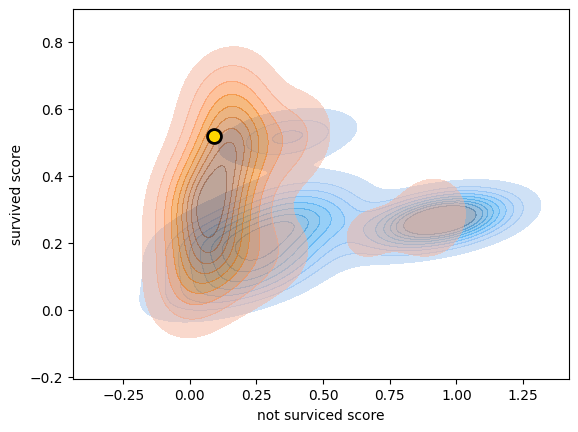

In [ ]:
repdf, resdf = explainer.plot_rep_instance_similarity(
    X_test,
    y_hat_test,
    x=movie_titanic.loc["Rose"].values,
    feature_names=movie_titanic.columns.values,
    class_names=["not surviced", "survived"],
    gamma=0.1,
    scaler=explainer.scaler,
    class_indices=[0, 1],
)


In [ ]:
repdf


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
not surviced,29.138821,0.30690,0.118339,11.669739,0.035142,0.088310,0.876548,-0.016603,1.016603,0.049686,0.032554,0.917760
survived,27.820752,0.44133,0.481025,48.424167,0.469132,0.293968,0.236899,0.868609,0.131391,0.243288,0.081966,0.674746


In [ ]:
resdf


,not surviced score,survived score,result
0,0.346944,0.165969,0
1,0.971396,0.274283,0
2,0.047525,0.025773,0
3,0.028980,0.269170,1
4,0.082613,0.234104,0
...,...,...,...
174,0.119770,0.273947,1
175,0.971546,0.274728,0
176,0.039588,0.332054,1
177,0.951103,0.270866,0


In [ ]:
repdf


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
not surviced,29.138821,0.30690,0.118339,11.669739,0.035142,0.088310,0.876548,-0.016603,1.016603,0.049686,0.032554,0.917760
survived,27.820752,0.44133,0.481025,48.424167,0.469132,0.293968,0.236899,0.868609,0.131391,0.243288,0.081966,0.674746


In [ ]:
resdf


,not surviced score,survived score,result
0,0.346944,0.165969,0
1,0.971396,0.274283,0
2,0.047525,0.025773,0
3,0.028980,0.269170,1
4,0.082613,0.234104,0
...,...,...,...
174,0.119770,0.273947,1
175,0.971546,0.274728,0
176,0.039588,0.332054,1
177,0.951103,0.270866,0


## AIME_GPU

In [ ]:
import cupy as cp


In [ ]:
y_hat_train = model.predict_proba(X_train)
y_hat_test = model.predict_proba(X_test)


/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kosukeyano/workspace/huber_aime/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_train = cp.array(X_train)
X_test = cp.array(X_test)

y_hat_train = cp.array(y_hat_train)
y_hat_test = cp.array(y_hat_test)


In [ ]:
explainer = AIME_GPU()
explainer.create_explainer(X_train, y_hat_train, normalize=True)


In [ ]:
explainer.A_dagger.shape


(12, 2)

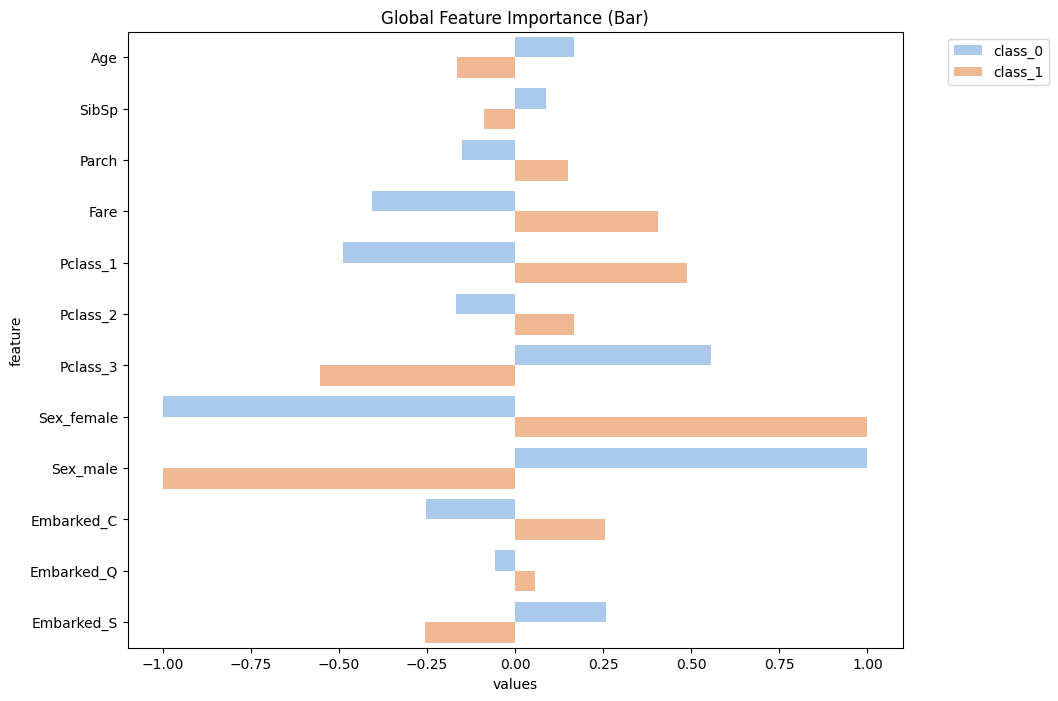

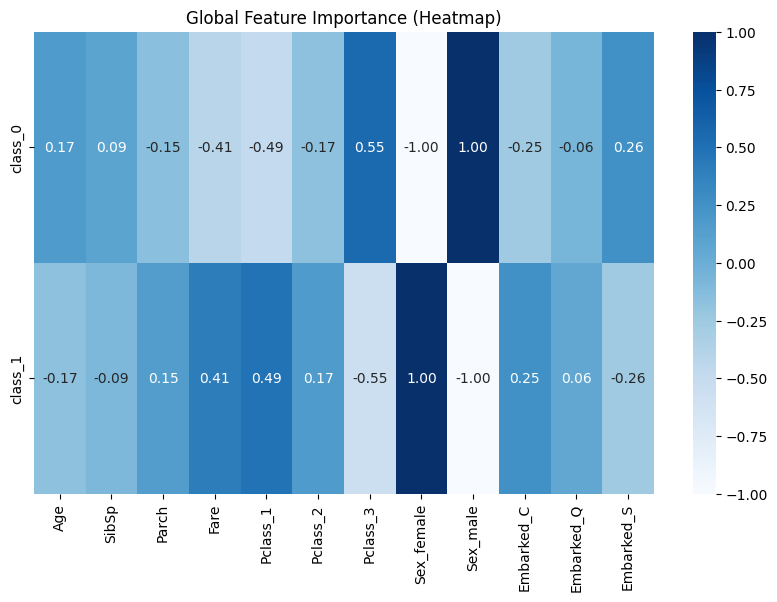

In [ ]:
global_importance_df = explainer.global_feature_importance(
    feature_names=movie_titanic.columns.values
)


In [ ]:
global_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,0.166039,0.087942,-0.150712,-0.406625,-0.487562,-0.16811,0.554983,-1.0,1.0,-0.254194,-0.056719,0.256754
class_1,-0.166039,-0.087942,0.150712,0.406625,0.487562,0.16811,-0.554983,1.0,-1.0,0.254194,0.056719,-0.256754


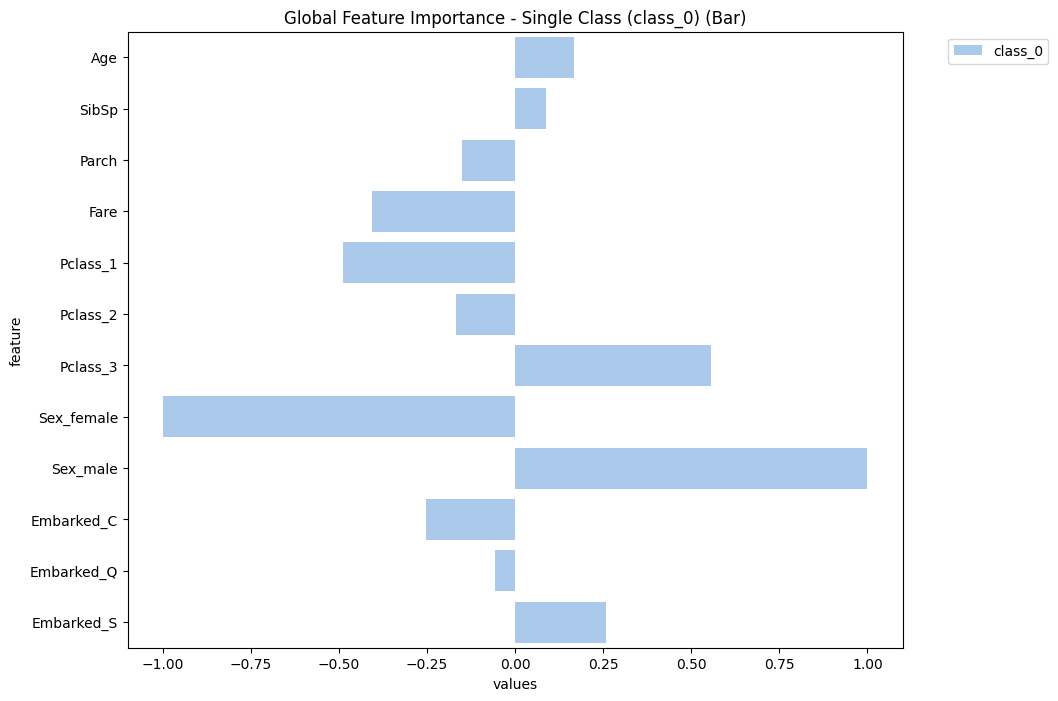

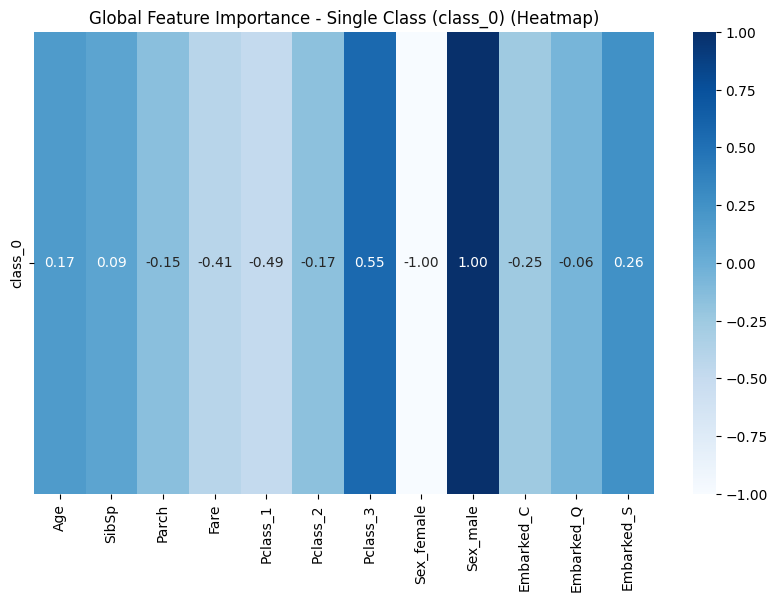

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=0
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,0.166039,0.087942,-0.150712,-0.406625,-0.487562,-0.16811,0.554983,-1.0,1.0,-0.254194,-0.056719,0.256754


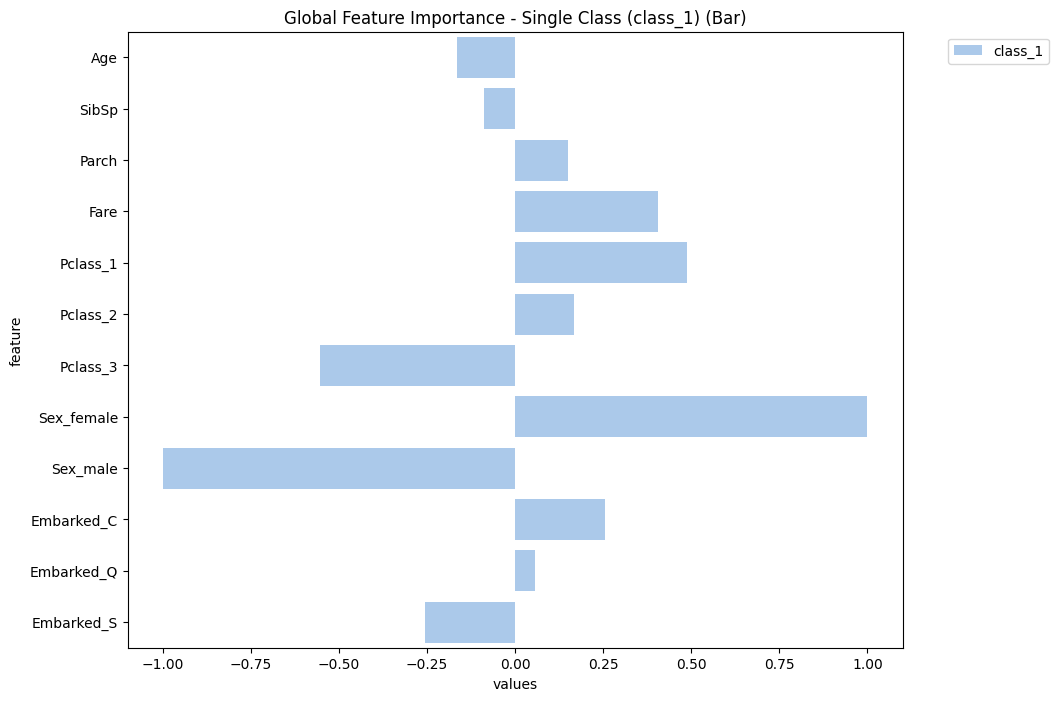

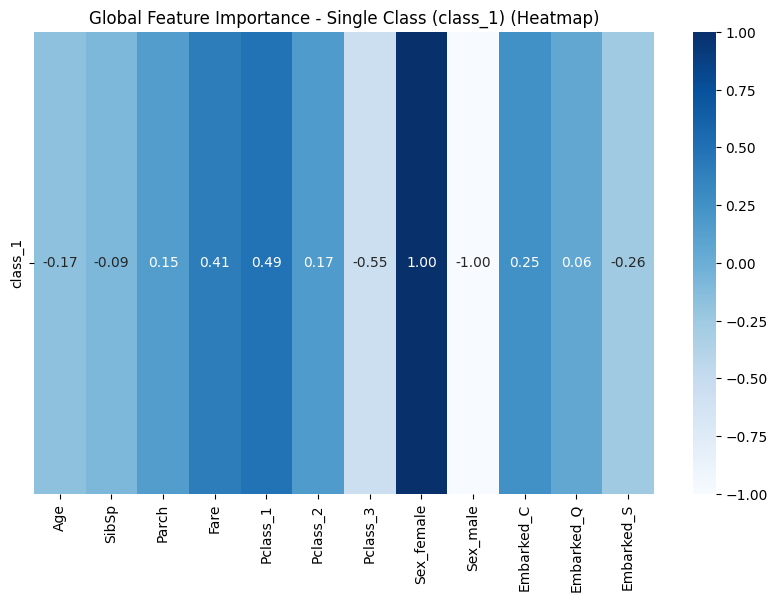

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=1
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_1,-0.166039,-0.087942,0.150712,0.406625,0.487562,0.16811,-0.554983,1.0,-1.0,0.254194,0.056719,-0.256754


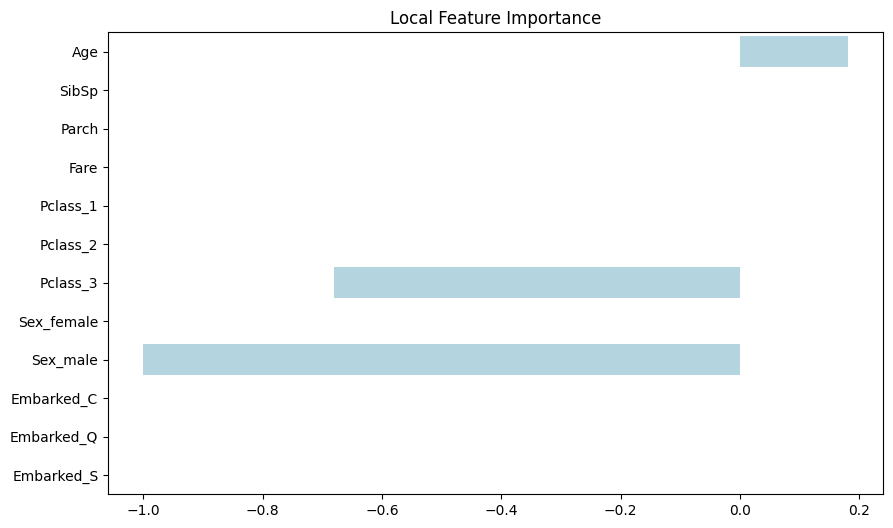

In [ ]:
local_importance_df = explainer.local_feature_importance(
    movie_titanic.loc["Jack"].values,
    [0, 1],
    feature_names=movie_titanic.columns.values,
    scaler=None,
    ignore_zero_features=True,
)


In [ ]:
local_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.180874,0.0,-0.0,-0.0,-0.0,-0.0,-0.680227,-0.0,-1.0,-0.0,-0.0,0.0


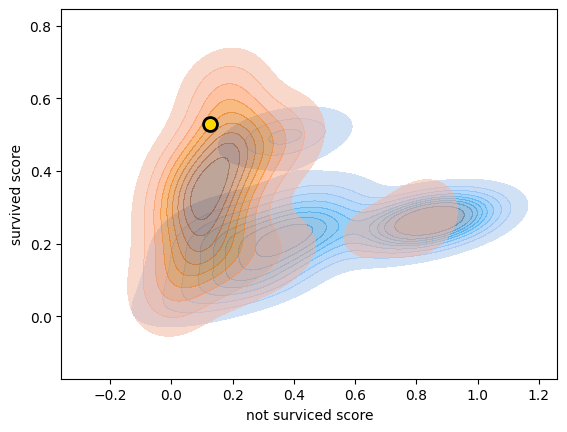

In [ ]:
repdf, resdf = explainer.plot_rep_instance_similarity(
    X_test,
    y_hat_test,
    x=movie_titanic.loc["Rose"].values,
    feature_names=movie_titanic.columns.values,
    class_names=["not surviced", "survived"],
    gamma=0.1,
    scaler=explainer.scaler,
    class_indices=[0, 1],
)


In [ ]:
repdf


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
not surviced,30.839822,0.595886,0.309936,18.372475,0.101116,0.160110,0.738774,0.031707,0.968293,0.116345,0.079145,0.804510
survived,27.084390,0.422770,0.523536,53.548870,0.460032,0.277307,0.262661,0.853598,0.146402,0.285402,0.107157,0.607441


In [ ]:
resdf


,not surviced score,survived score,result
0,0.383530,0.184916,0
1,0.872012,0.268953,0
2,0.065793,0.029590,0
3,0.047057,0.298009,1
4,0.111706,0.260360,0
...,...,...,...
174,0.139423,0.300202,1
175,0.872380,0.269444,0
176,0.063528,0.361741,1
177,0.845510,0.266778,0


## HuberAIME_GPU

In [ ]:
# y_hat_train = model.predict_proba(X_train)
# y_hat_test = model.predict_proba(X_test)


In [ ]:
# X_train = cp.array(X_train)
# X_test = cp.array(X_test)

# y_hat_train = cp.array(y_hat_train)
# y_hat_test = cp.array(y_hat_test)


In [ ]:
explainer = AIME_GPU(use_huber=True)
explainer.create_explainer(X_train, y_hat_train, normalize=True)


In [ ]:
explainer.A_dagger.shape


(12, 2)

In [ ]:
explainer.A_dagger


array([[-0.01990708, -0.12053274],
       [-0.19525109, -0.07733481],
       [-0.33323296,  0.10864024],
       [-0.40305738,  0.33056262],
       [-0.4776187 ,  0.54035434],
       [-0.28915892,  0.22021939],
       [ 0.64481952, -0.64262995],
       [-0.76370351,  1.09603633],
       [ 0.76370351, -1.09603633],
       [-0.34139398,  0.16125002],
       [-0.20045298, -0.0276952 ],
       [ 0.42479826, -0.12190209]])

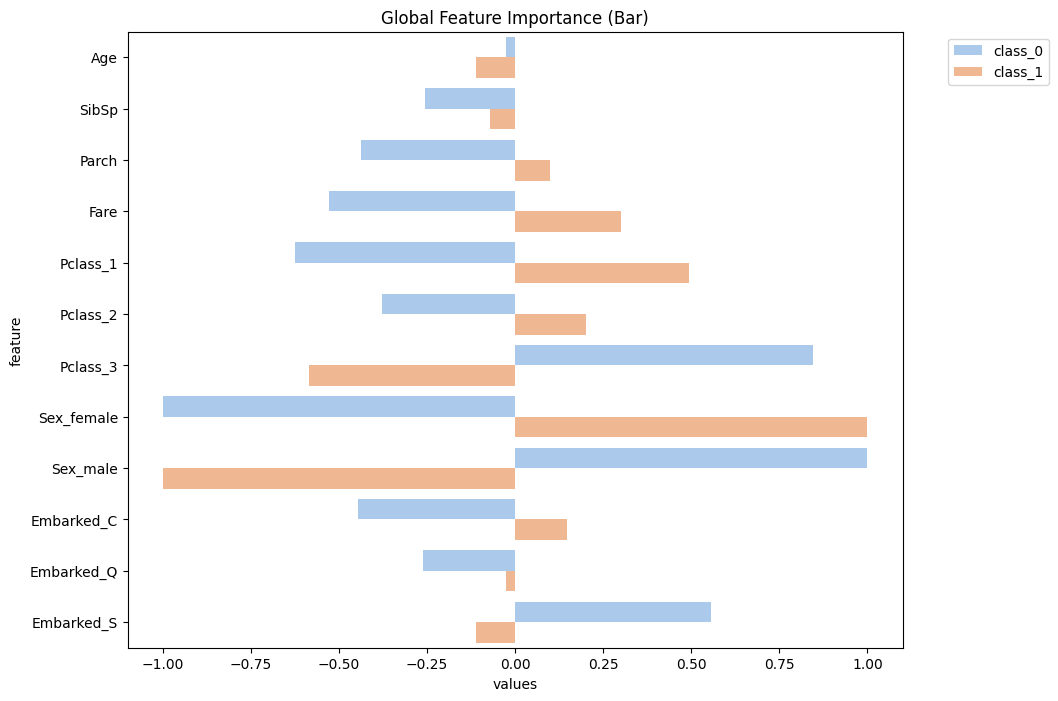

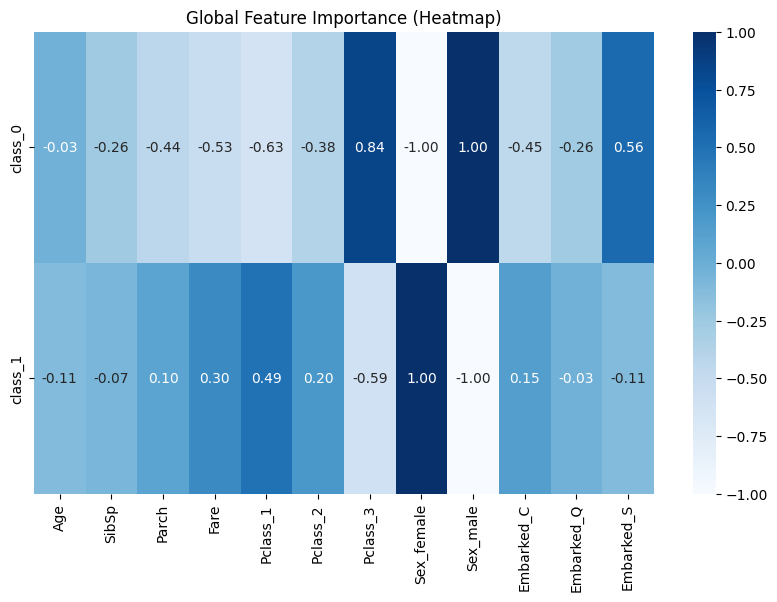

In [ ]:
global_importance_df = explainer.global_feature_importance(
    feature_names=movie_titanic.columns.values
)


In [ ]:
global_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,-0.026067,-0.255663,-0.436338,-0.527767,-0.625398,-0.378627,0.844332,-1.0,1.0,-0.447024,-0.262475,0.556235
class_1,-0.109971,-0.070559,0.099121,0.301598,0.493008,0.200923,-0.586322,1.0,-1.0,0.147121,-0.025269,-0.111221


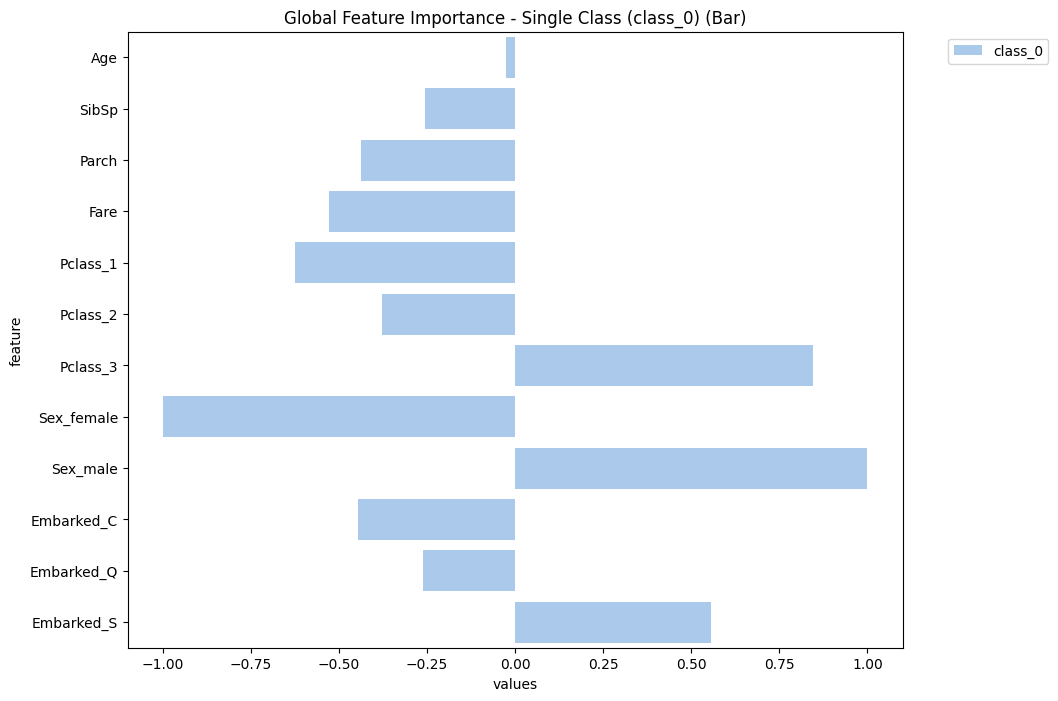

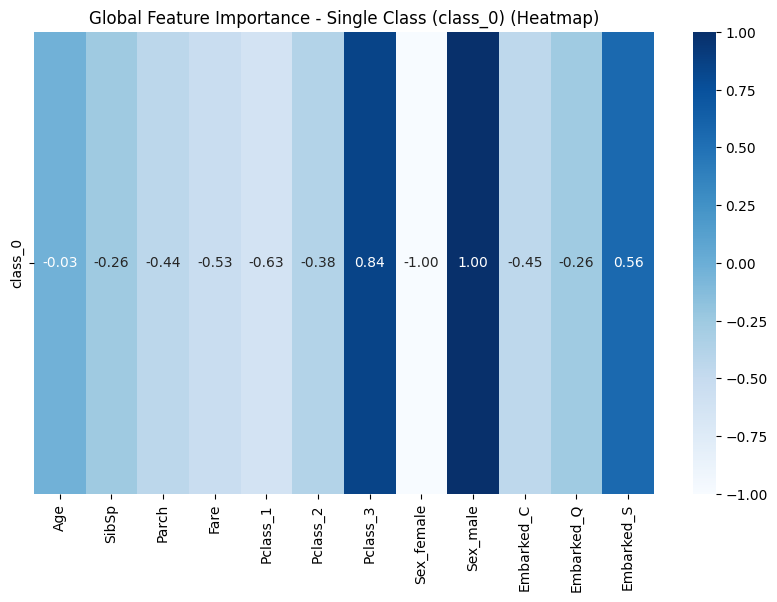

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=0
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_0,-0.026067,-0.255663,-0.436338,-0.527767,-0.625398,-0.378627,0.844332,-1.0,1.0,-0.447024,-0.262475,0.556235


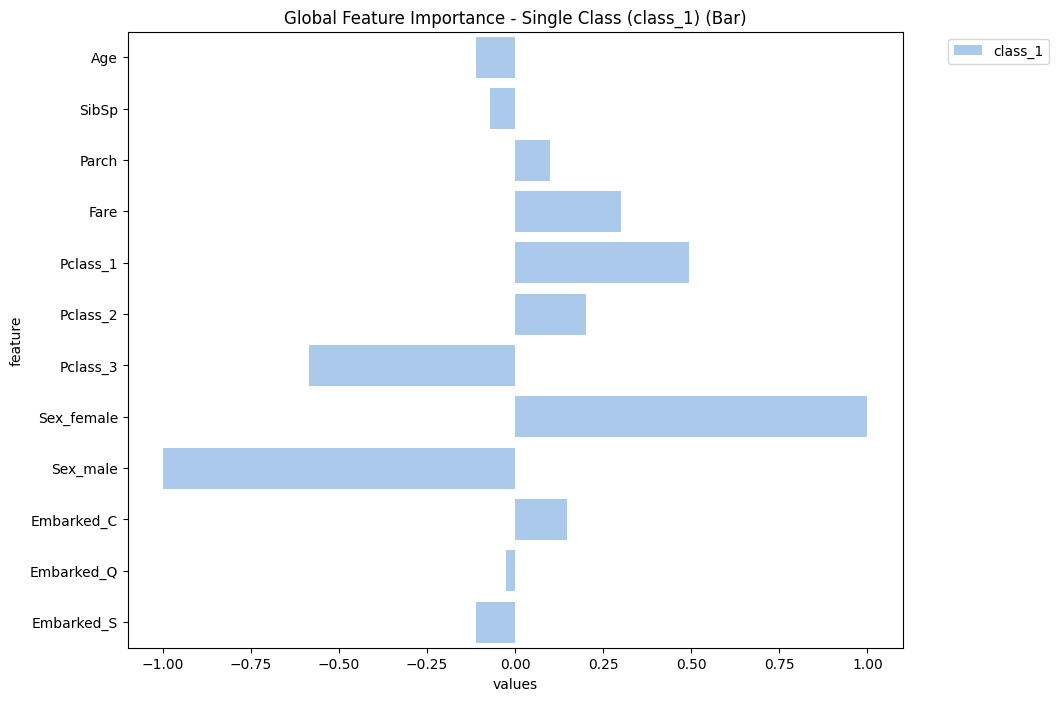

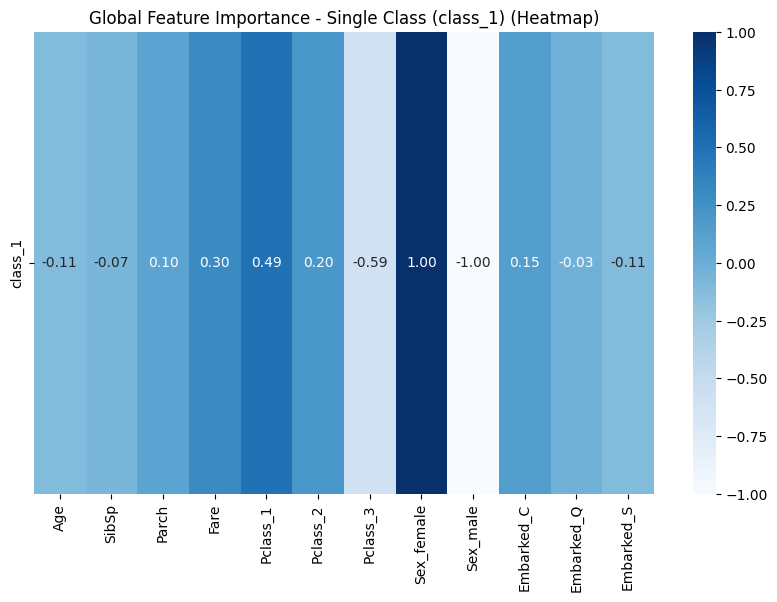

In [ ]:
global_feature_importance = explainer.global_feature_importance_each(
    feature_names=movie_titanic.columns.values, top_k_criterion="max", class_num=1
)


In [ ]:
global_feature_importance


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
class_1,-0.109971,-0.070559,0.099121,0.301598,0.493008,0.200923,-0.586322,1.0,-1.0,0.147121,-0.025269,-0.111221


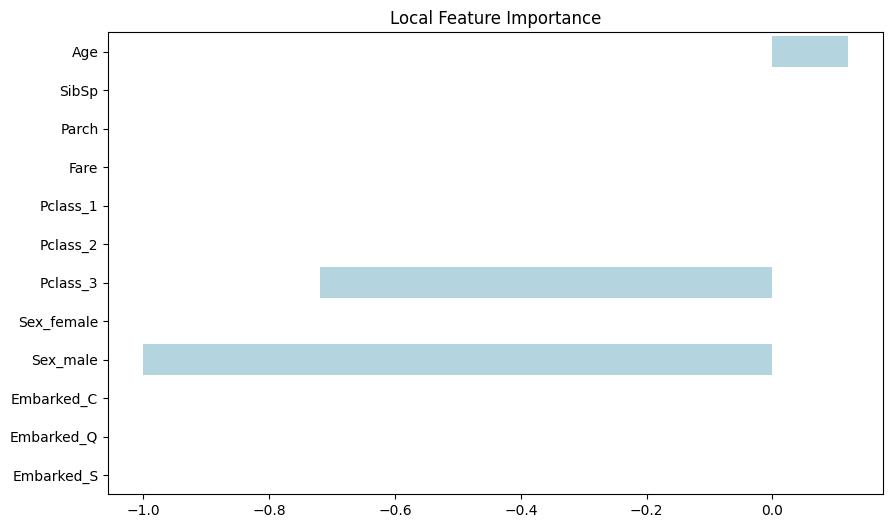

In [ ]:
local_importance_df = explainer.local_feature_importance(
    movie_titanic.loc["Jack"].values,
    [0, 1],
    feature_names=movie_titanic.columns.values,
    scaler=None,
    ignore_zero_features=True,
)


In [ ]:
local_importance_df


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.119797,0.0,-0.0,-0.0,-0.0,-0.0,-0.718638,-0.0,-1.0,-0.0,0.0,0.0


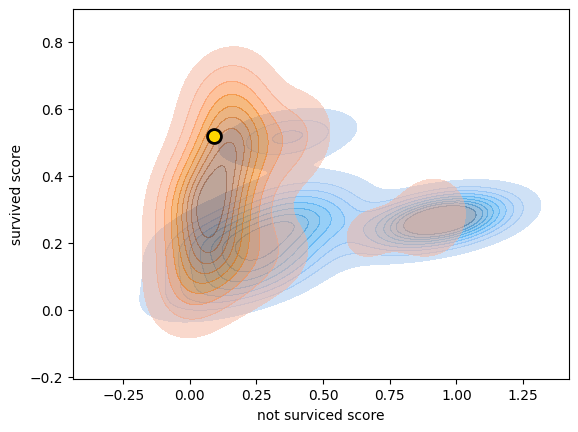

In [ ]:
repdf, resdf = explainer.plot_rep_instance_similarity(
    X_test,
    y_hat_test,
    x=movie_titanic.loc["Rose"].values,
    feature_names=movie_titanic.columns.values,
    class_names=["not surviced", "survived"],
    gamma=0.1,
    scaler=explainer.scaler,
    class_indices=[0, 1],
)


In [ ]:
repdf


,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
not surviced,29.138821,0.30690,0.118339,11.669739,0.035142,0.088310,0.876548,-0.016603,1.016603,0.049686,0.032554,0.917760
survived,27.820752,0.44133,0.481025,48.424167,0.469132,0.293968,0.236899,0.868609,0.131391,0.243288,0.081966,0.674746


In [ ]:
resdf


,not surviced score,survived score,result
0,0.346944,0.165969,0
1,0.971396,0.274283,0
2,0.047525,0.025773,0
3,0.028980,0.269170,1
4,0.082613,0.234104,0
...,...,...,...
174,0.119770,0.273947,1
175,0.971546,0.274728,0
176,0.039588,0.332054,1
177,0.951103,0.270866,0
